In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [34]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [35]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [36]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

582

In [37]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [38]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=6b0076e8001730f0022f3a6be4cb9086


In [39]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [40]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | castro
Processing Record 5 of Set 1 | tawkar
City not found. Skipping...
Processing Record 6 of Set 1 | saldanha
Processing Record 7 of Set 1 | dikson
Processing Record 8 of Set 1 | nikolskoye
Processing Record 9 of Set 1 | khandyga
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | chapais
Processing Record 13 of Set 1 | altstatten
Processing Record 14 of Set 1 | kita
Processing Record 15 of Set 1 | muyezerskiy
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | road town
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | saskylakh
Processing Record 22 of Set 1 | barentsburg
City not fou

Processing Record 32 of Set 4 | xai-xai
Processing Record 33 of Set 4 | novopokrovskaya
Processing Record 34 of Set 4 | bereda
Processing Record 35 of Set 4 | asyut
Processing Record 36 of Set 4 | nouadhibou
Processing Record 37 of Set 4 | podyuga
Processing Record 38 of Set 4 | bosaso
Processing Record 39 of Set 4 | marsa matruh
Processing Record 40 of Set 4 | ocampo
Processing Record 41 of Set 4 | chelmsford
Processing Record 42 of Set 4 | gondanglegi
Processing Record 43 of Set 4 | mount isa
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | faya
Processing Record 46 of Set 4 | carnarvon
Processing Record 47 of Set 4 | bushehr
Processing Record 48 of Set 4 | bam
Processing Record 49 of Set 4 | mahebourg
Processing Record 50 of Set 4 | ponta do sol
Processing Record 1 of Set 5 | mitu
Processing Record 2 of Set 5 | kavieng
Processing Record 3 of Set 5 | touros
Processing Record 4 of Set 5 | kieta
Processing Record 5 of Set 5 | mariara
Processing Record 6 of Set 5 | 

Processing Record 22 of Set 8 | milkovo
Processing Record 23 of Set 8 | canmore
Processing Record 24 of Set 8 | puerto el triunfo
Processing Record 25 of Set 8 | talnakh
Processing Record 26 of Set 8 | san ignacio
Processing Record 27 of Set 8 | iwanai
Processing Record 28 of Set 8 | do rud
City not found. Skipping...
Processing Record 29 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 30 of Set 8 | lannion
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | boguchany
Processing Record 33 of Set 8 | remedios
Processing Record 34 of Set 8 | alenquer
Processing Record 35 of Set 8 | salinopolis
Processing Record 36 of Set 8 | mabaruma
Processing Record 37 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 38 of Set 8 | quatre cocos
Processing Record 39 of Set 8 | los gatos
Processing Record 40 of Set 8 | fevralsk
City not found. Skipping...
Processing Record 41 of Set 8 | simi
Processing Record 42 of Set 8 | borkenes
Processing Record 43 of S

Processing Record 8 of Set 12 | palana
Processing Record 9 of Set 12 | phan rang
City not found. Skipping...
Processing Record 10 of Set 12 | rio grande
Processing Record 11 of Set 12 | jalu
Processing Record 12 of Set 12 | saquarema
Processing Record 13 of Set 12 | la union
Processing Record 14 of Set 12 | ossora
Processing Record 15 of Set 12 | galdar
Processing Record 16 of Set 12 | buchanan
Processing Record 17 of Set 12 | dumbraveni
Processing Record 18 of Set 12 | goya
Processing Record 19 of Set 12 | carmen
Processing Record 20 of Set 12 | takoradi
Processing Record 21 of Set 12 | lasa
Processing Record 22 of Set 12 | pangkalanbuun
Processing Record 23 of Set 12 | kununurra
Processing Record 24 of Set 12 | abu dhabi
Processing Record 25 of Set 12 | kachikau
City not found. Skipping...
Processing Record 26 of Set 12 | port hawkesbury
Processing Record 27 of Set 12 | otane
Processing Record 28 of Set 12 | grindavik
Processing Record 29 of Set 12 | russell
Processing Record 30 of S

In [41]:
len(city_data)

524

In [42]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.0970,-79.2353,49.59,32,20,8.05,US,2022-04-15 00:28:21
1,Rikitea,-23.1203,-134.9692,78.01,68,13,16.42,PF,2022-04-15 00:30:00
2,Puerto Ayora,-0.7393,-90.3518,76.19,89,31,7.58,EC,2022-04-15 00:30:01
3,Castro,-24.7911,-50.0119,54.95,98,5,4.94,BR,2022-04-15 00:30:02
4,Saldanha,-33.0117,17.9442,50.05,76,53,18.43,ZA,2022-04-15 00:30:03
5,Dikson,73.5069,80.5464,18.75,89,100,9.04,RU,2022-04-15 00:30:04
6,Nikolskoye,59.7035,30.7861,37.87,96,100,2.39,RU,2022-04-15 00:30:05
7,Khandyga,62.6667,135.6000,24.24,76,20,4.99,RU,2022-04-15 00:30:06
8,Hobart,-42.8794,147.3294,63.27,64,100,26.46,AU,2022-04-15 00:30:03
9,Bluff,-46.6000,168.3333,58.71,63,100,9.86,NZ,2022-04-15 00:30:07


In [43]:
# rearrange column order
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-04-15 00:28:21,42.0970,-79.2353,49.59,32,20,8.05
1,Rikitea,PF,2022-04-15 00:30:00,-23.1203,-134.9692,78.01,68,13,16.42
2,Puerto Ayora,EC,2022-04-15 00:30:01,-0.7393,-90.3518,76.19,89,31,7.58
3,Castro,BR,2022-04-15 00:30:02,-24.7911,-50.0119,54.95,98,5,4.94
4,Saldanha,ZA,2022-04-15 00:30:03,-33.0117,17.9442,50.05,76,53,18.43
5,Dikson,RU,2022-04-15 00:30:04,73.5069,80.5464,18.75,89,100,9.04
6,Nikolskoye,RU,2022-04-15 00:30:05,59.7035,30.7861,37.87,96,100,2.39
7,Khandyga,RU,2022-04-15 00:30:06,62.6667,135.6000,24.24,76,20,4.99
8,Hobart,AU,2022-04-15 00:30:03,-42.8794,147.3294,63.27,64,100,26.46
9,Bluff,NZ,2022-04-15 00:30:07,-46.6000,168.3333,58.71,63,100,9.86


In [44]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [45]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

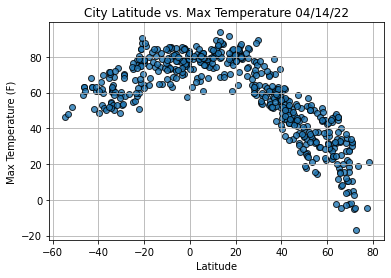

In [46]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

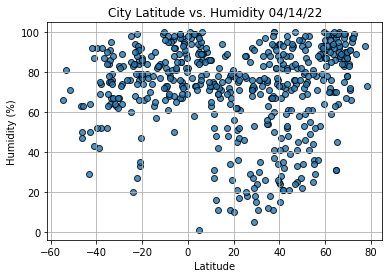

In [47]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

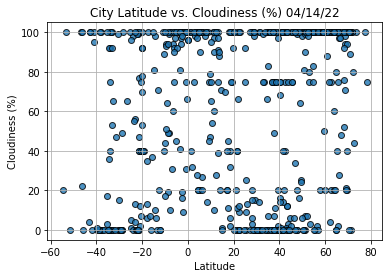

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

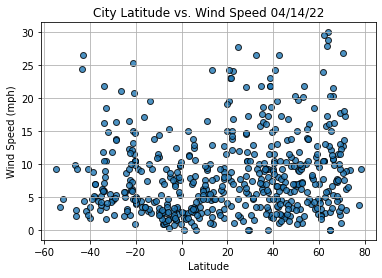

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [74]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()

In [75]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Jamestown,US,2022-04-15 00:28:21,42.0970,-79.2353,49.59,32,20,8.05
5,Dikson,RU,2022-04-15 00:30:04,73.5069,80.5464,18.75,89,100,9.04
6,Nikolskoye,RU,2022-04-15 00:30:05,59.7035,30.7861,37.87,96,100,2.39
7,Khandyga,RU,2022-04-15 00:30:06,62.6667,135.6000,24.24,76,20,4.99
10,Chapais,CA,2022-04-15 00:30:07,49.7834,-74.8492,35.38,96,100,10.63


In [76]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [83]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
plt.show()

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [88]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

In [92]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

In [93]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))